# DATA MINING Project

This notebook contains all the steps as outlined in the Project Templates provided in class. Phases 2 and 3 and combined as each model use Grid Search to tune the model.

---


**NOTE**
This notebook contains all the steps in this project.

# Human Activity Recognition
Wondered how our smartphones know if we are sitting or standing? Currently, most smartphones have built in sensors that recognizes our daily activities. In this project, we will create a model for correctly classifying human activities using the dataset from https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones#

We will classify each activity as one of the following:
 - Walking
 - Walking Upstairs
 - Walking Downstairs
 - Sitting
 - Standing
 - Laying

## Loading Data

In the cells below, make sure to do the following:

1. Load your dataset. If your dataset contains multiple files (e.g. AirBnB), make sure to merge them.
2. Decide what attribute you want to predict (you can change your mind later during EDA if needed).

### Types of Attributes

Below are some examples of types of attributes you may encounter. For some types of data, ML algorithms cannot use them directly, so we have to encode them somehow. We have summarized ways to deal with these non-traditional data types. There are more examples in Follow content for this week.

Make a note of which types of data your dataset has.

Traditional data types (individual numbers/values): no transformation needed

  * Nominal
    * Binary
  * Ordinal
  * Interval
  * Ratio
  * Continuous
  * Discrete

Non-traditional data types:
 
* **Text**
    * Encode with: [Bag of Words](https://scikit-learn.org/stable/modules/feature_extraction.html#the-bag-of-words-representation), [TF-IDF](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting), Embeddings
* **Sets** (e.g. tags {"Blog", "Video", "Finance Article"})
    * We should not treat these like  bag of words, since tags can be multi word
    * We can use [one hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).
* **Time series data**: A series of numbers, e.g. predict the stock price next year from the last N years of prices.
    * Naive approaches: We can use each of the following as a separate feature:
        * Last value: Use the last value in the series.
        * Average, Median: Use the average or median of the values.
        * Max/min: Use the max and min of the values.
    * A more effective approach is to use a ML model that can take time-series data in as an input, such as an [Long Short-Term Memory](https://en.wikipedia.org/wiki/Long_short-term_memory) model, but these are out of scope for this course.
* **Numeric Data** that isn't directly interpretable (e.g. geospatial data)
    * This varies from situation to situation. Sometimes your data is numeric but isn't directly predictive of your class label (e.g. latitude and longitude; movie title). However, you may be able to combine this with other datasets to construct more meaningful features (e.g. State, Movie Genre).

In [84]:
# Load initial packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn as skl

In [2]:

# load the data
# data was already split into test and train. We will load both first then merge in the next few steps.
train = pd.read_csv("train1.csv")

# observing the train data
print('Train Data', train.shape,'\n', train.columns)

Train Data (7352, 563) 
 Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)


In [3]:
# load the test data
test = pd.read_csv("test1.csv")

# observe the test data and check columns
print('Train Data', test.shape,'\n', test.columns)

Train Data (2947, 563) 
 Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)


In [4]:
# combine both but we will sill distinguish train from test

# train['Data'] = 'Train'
# test['Data'] = 'Test'
train_test = pd.concat([train, test], axis=0).reset_index(drop=True)
# train_test['subject'] = '#' + train_test['subject'].astype(str)

print(f'Train dataset has a shape of ', train.shape)
print(f'Test dataset has a shape of ', test.shape)
print(f'Combined dataset has a shape of ', train_test.shape)

Train dataset has a shape of  (7352, 563)
Test dataset has a shape of  (2947, 563)
Combined dataset has a shape of  (10299, 563)


In [5]:
train_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [6]:
# check for Nan/Nulls and Number of Unique values 
def har_data_details(df):
    b = pd.DataFrame()
    b['NaN/Nulls'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
har_data_details(train_test)

,NaN/Nulls,N unique value,dtype
tBodyAcc-mean()-X,0,10292,float64
tBodyAcc-mean()-Y,0,10299,float64
tBodyAcc-mean()-Z,0,10293,float64
tBodyAcc-std()-X,0,10295,float64
tBodyAcc-std()-Y,0,10297,float64
...,...,...,...
"angle(X,gravityMean)",0,10299,float64
"angle(Y,gravityMean)",0,10299,float64
"angle(Z,gravityMean)",0,10299,float64
subject,0,30,int64


In [7]:
# another method to check for any duplicates, and NaN/null values

print('There are {} duplicates and'.format(sum(train_test.duplicated())))
print('we have {} Nan/Null values from our dataset'.format(train_test.isnull().values.sum()))

There are 0 duplicates and
we have 0 Nan/Null values from our dataset


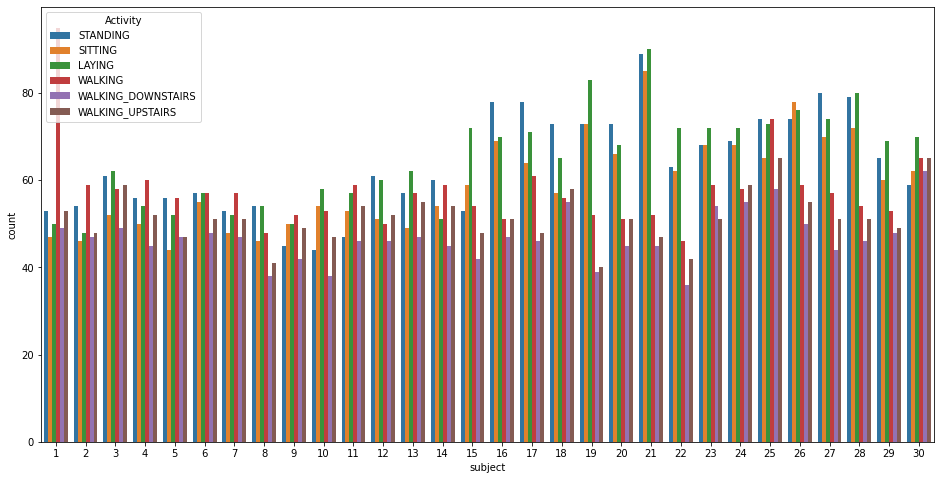

In [8]:
# possible check for data imbalance
plt.figure(figsize=(16,8))
sb.countplot(x = 'subject', hue = 'Activity',data = train_test)

plt.show()

From the graph above, it is clear that each subject has contributed to each of the activities recorded.

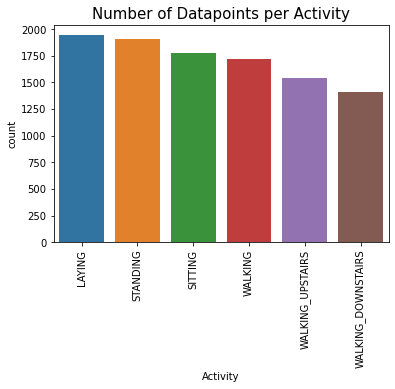

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64


In [9]:
labels= train_test['Activity']

sb.countplot(labels, order = train_test['Activity'].value_counts().index)
plt.xticks(rotation= 90)
plt.title('Number of Datapoints per Activity', fontsize = 15)
plt.show()
print(labels.value_counts())

Accordingly, it shows that laying has the most count at 1944 and walking_downstairs has the lowest count at 1406. Although there is a difference of 538, it is safe to say that we have a fairly distributed activities.

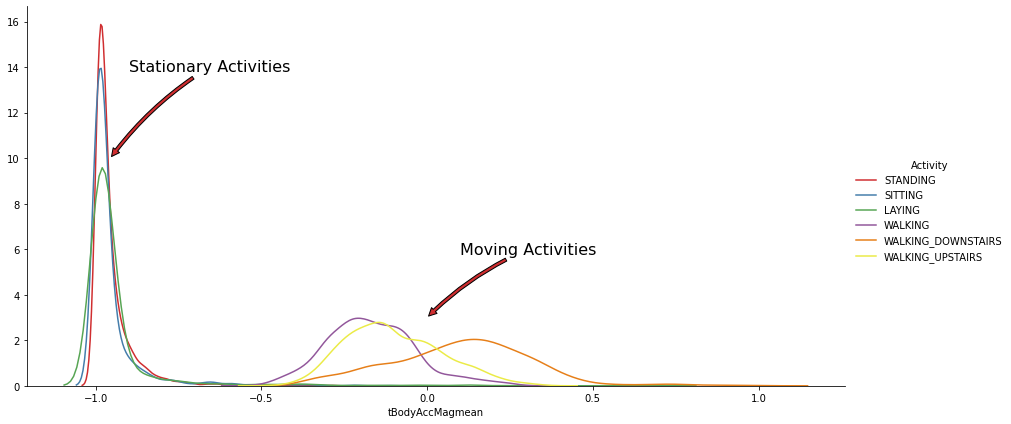

In [12]:
# IMPORTANT: Run the feature transformation first before moving on to this
# differentiate/ classify the activities into 
# stationary: laying, sitting, standing and 
# Moving: walking, walking_downstairs, walking_upstairs

sb.set_palette("Set1", desat=0.80)
facetgrid = sb.FacetGrid(train_test, hue='Activity', height=6,aspect=2)
facetgrid.map(sb.distplot,'tBodyAccMagmean', hist=False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,10), xytext=(-0.9, 14), size=16,\
            va='center', ha='left',
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.1, 6), size=16,
            va='center', ha='left',
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

From the graph above shows the representation of separation of our stationary activities against moving activities. Al stationary activities has acceleration mean at -1 while when subjects are moving, the acceleration is higher than -0.5.

The attribute I will predict is: **Write your attribute here**

***ANSWER*** We classify the activity as one of the following:
 - Walking
 - Walking Upstairs
 - Walking Downstairs
 - Sitting
 - Standing
 - Laying

## Exploratory Data Analysis (EDA)

Using some of the techniques in the "Follow" document, explore your dataset. Then answer the following questions (you don't have to solve the problems yet - just be aware of them):

1. What attribute are you predicting and what type of supervised learning is this?
    * Binary Classification: Just 2 class labels
    * Multi-class classification: More than 2 class labels
    * Regression: A continuous variable
    * Ordinal classification: Predicting an ordinal value, e.g. a rating on a 5-star scale 
        * This is tricky! Do you want to change this into regression or binarize your variable to make this binary classification?

2. Do you need to perform feature selection?
    * E.g. do you have hihgly correlated features?

3. Do you have any non-traditional attributes (see the list above)? If so how will you encode them? (You don't have to do it yet.)

4. If you are doing classification, are your class labels balanced (similar numbers of instances from each class)?

5. If you are doing regression, how is your dependent variable distributed (e.g. normally, skewed)?
    
6. Do any of your features need transformation (e.g. because they have a skewed distribution)?


Answer the questions below:

1. This is a multi-class classification problem as we have 6 activities to detect.
2. There is no need for feature selection. We will use each of them for data analysis
3. We have a time series data where an activity is recorded over time. However, since this is a classification problem, we will focus on the logistic regression, decision tree, and SVC
4. We will find out later if we have balanced number of instances using bar graphs of each activity
5. We will experiment on logistic regression if something useful will come out 
6. No

## Preprocessing

Do the following steps on your data (and any others you think are needed). See the "Follow" examples, as well as the original Week 2 materials for more on how to do each step.

1. **Feature Cleaning**: Remove meaningless features (e.g. IDs), or unfair features that make the problem too easy (e.g. percent grade should be removed if predicing final letter grade).
2. **Feature Discretization**: Discretize any attributes that should be discretized.
3. **Feature Transformation** Encode non-standard features into usable formats (standardize dates, vectorize words). Tranform any features (e.g. using a log-transform) as needed.
4. **Feature Selection**: Remove redundant, noisy features or unhelpful features.
5. **Aggregation**: If your data has multiple rows per class label, transform it so that there is only one row per class label.

Now revisit EDA as needed to see what your transformed dataset looks like.

If you don't need to do a given step, just skip it an exaplin why.

### 1) Feature cleaning

### 2) Feature discretization

### 3) Feature transformation


In [11]:
# removing unnecessary characters

clean_columns = train_test.columns

clean_columns = clean_columns.str.replace('[()]','')
clean_columns = clean_columns.str.replace('[-]','')
clean_columns = clean_columns.str.replace('[,]','')

train_test.columns = clean_columns

train_test.columns


Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

In [13]:
train_test['tBodyAccMagmean']

0       -0.959434
1       -0.979289
2       -0.983703
3       -0.986542
4       -0.992827
           ...   
10294   -0.200885
10295   -0.170563
10296   -0.207603
10297   -0.233866
10298   -0.224309
Name: tBodyAccMagmean, Length: 10299, dtype: float64

### 4) Feature selection

We will look deeper into if we can clearly classify each activity using boxplots

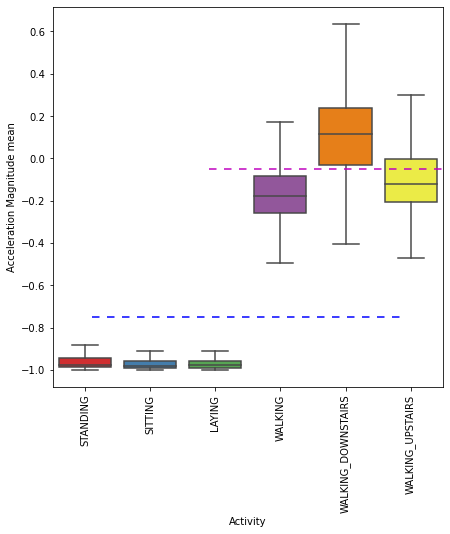

In [14]:
plt.figure(figsize=(7,7))
sb.boxplot(x='Activity', y='tBodyAccMagmean',data=train_test, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.75, xmin=0.1, xmax=0.9,dashes=(5,5), c='b')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

From the boxplots above, we can conclude that:
 - If tAccMean is < -0.75 then the Activities are either Standing, Sitting or Laying.
 - If tAccMean is > -0.6 then the Activities are either Walking, Walking_Downstairs or Walking_Upstairs.
 - If tAccMean > 0.0 then the Activity is WalkingDownstairs.

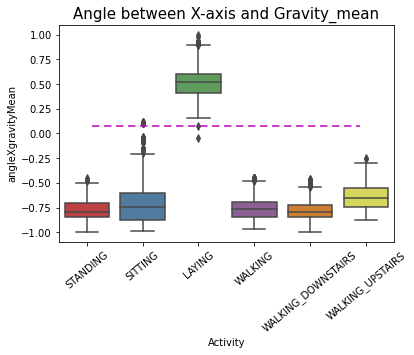

In [15]:
sb.boxplot(x='Activity', y='angleXgravityMean', data=train_test)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

From the boxplot above, when the angle between x-axis and gravity mean is higher than 0, we can easily identify the activity as Laying. 

### 5) Aggregation

In [16]:
pd.crosstab(train_test['subject'], train_test['Activity'])

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
subject,,,,,,
1,50,47,53,95,49,53
2,48,46,54,59,47,48
3,62,52,61,58,49,59
4,54,50,56,60,45,52
5,52,44,56,56,47,47
6,57,55,57,57,48,51
7,52,48,53,57,47,51
8,54,46,54,48,38,41
9,50,50,45,52,42,49


In [17]:
train_test.describe()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,16.146422
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898,8.679067
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880,9.000000
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,17.000000
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


### Revisiting EDA

In [20]:
# exported a cleaned dataset for later use, where necessary

# train_test.to_csv('HAR_data.csv', index=False)

train_test

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS


# Project Template: Phase 2
Below are some concrete steps that you can take while doing your analysis for phase3. This guide isn't "one size fit all" so you will probably not do everything listed. But it still serves as a good "pipeline" for how to do data analysis.

If you do engage in a step, you should clearly mention it in the notebook.

## 2.0) Export and Import your data
Since your existing work is in another notebook, you have a few choices:

Export the relevant dataframes (with the preprocessing you want to keep) and re-import it here. Note: Many pre-processing steps should not be performed prior to the train/test split (see section 2.3), so you may not need to export all the change.
Continue to work in your first notebook, and copy the relevant template code from this notebook.
Copy over the most relevant code from your 1st notebook here, and just use the knowledge you've gained from EDA.

### 2.1) Decide on what models you will use and compare
Select at least 3 models to compare on your prediction task. At least 2 of your models should be ones we've covered in class.

Some resources try to help you select a well-performing model for your data:

 - sklearn's Flowchart
 - geeks4geeks Flowchart 
 - SAS Cheatsheet 

Note: These are general guides, and not guarantees of success. Some of the models are also outside of what we have covered, but you can explore them if you want to.

In addition to selecting a model you think will perform well, there are other reasons to select a model:

 - To serve as a baseline (naive) approach you expect to outperform with more complex/appropriate models.
 - You need a model that is human interpretable (e.g. Decision Tree).
 - The model has historically performed well on similar tasks.
 - Some properties of the model are effective for the type of data you have. Remember, at the end of most Seminars, you learned the strengths and weaknesses of each model.

1. Model Logistic Regression: I am selecting Logistic Regression because we have a classification problem that will fall into any of the six human activities.
2. Model Linear SVC: I am selecting Linear SVC because we want to fit the data in the best fit hyperplane to have a more accurate classification.
3. Model ZZZ: I am selecting ZZZ because...

### 2.2) Split into train and test
Make sure to split your data before you apply any transformations.

In [18]:
df = train_test.copy()
activity = df['Activity']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, activity, test_size = 0.25, random_state = 0)

In [19]:
print('Training data size : ', X_train.shape)
print('Test data size : ', X_test.shape)

Training data size :  (7724, 563)
Test data size :  (2575, 563)


0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object

### 2.2.1) Sampling (If needed)
not needed

## 2.3) Feature Transformation

In [26]:
# trainData = X_train.drop('Activity', axis = 1).values

#y_train = y_train.Activity
X_train = X_train.drop(['subject', 'Activity'], axis=1)
#y_test = y_test.Activity
X_test = X_test.drop(['subject', 'Activity'], axis=1)

print('Training data size : ', X_train.shape)
print('Test data size : ', X_test.shape)
#trainLabel=X_train.Activity.values

Training data size :  (7724, 561)
Test data size :  (2575, 561)


In [27]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']
labels2 = ['WALKING_DOWNSTAIRS', 'SITTING', 'WALKING', ..., 'STANDING',
       'LAYING', 'SITTING']

In [ ]:
trainLabel


In [28]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

encoder.fit(y_train)
y_trainLabeled = encoder.transform(y_train)

In [29]:
y_trainLabeled

array([5, 3, 4, ..., 2, 0, 1])

In [30]:
encoder

LabelEncoder()

# Trying different models
 - NN using MLP
 - Logistic Regression
 - Random Forest Classifier
 - KNN
 - Decision Tree
 - Grid Search

In [31]:
# Neural Network using multi-layer
import sklearn.neural_network as nn

mlp_SGD = nn.MLPClassifier(hidden_layer_sizes=(90,) 
                        , max_iter=1000, alpha=1e-4 
                        , solver = 'sgd', verbose = 10 
                        , tol = 1e-19, random_state = 1 
                        , learning_rate_init=.001)

In [32]:
mlp_ADAM = nn.MLPClassifier(hidden_layer_sizes=(90,) 
                        , max_iter=1000, alpha=1e-4 
                        , solver = 'adam', verbose = 10 
                        , tol = 1e-19, random_state = 1 
                        , learning_rate_init=.001)

In [33]:
mlp_LBFGS = nn.MLPClassifier(hidden_layer_sizes=(90,) 
                        , max_iter=1000, alpha=1e-4 
                        , solver = 'lbfgs', verbose = 10 
                        , tol = 1e-19, random_state = 1 
                        , learning_rate_init=.001)

In [34]:
nnModelSGD=mlp_SGD.fit(X_train, y_train)

Iteration 1, loss = 1.44145345
Iteration 2, loss = 0.96766404
Iteration 3, loss = 0.78515268
Iteration 4, loss = 0.67883363
Iteration 5, loss = 0.60731970
Iteration 6, loss = 0.55267582
Iteration 7, loss = 0.50977402
Iteration 8, loss = 0.47449088
Iteration 9, loss = 0.44544004
Iteration 10, loss = 0.42113174
Iteration 11, loss = 0.39965771
Iteration 12, loss = 0.38068595
Iteration 13, loss = 0.36532938
Iteration 14, loss = 0.34933575
Iteration 15, loss = 0.33663438
Iteration 16, loss = 0.32421579
Iteration 17, loss = 0.31317958
Iteration 18, loss = 0.30294586
Iteration 19, loss = 0.29499026
Iteration 20, loss = 0.28592021
Iteration 21, loss = 0.27843324
Iteration 22, loss = 0.27140418
Iteration 23, loss = 0.26413840
Iteration 24, loss = 0.25828054
Iteration 25, loss = 0.25236272
Iteration 26, loss = 0.24688195
Iteration 27, loss = 0.24177556
Iteration 28, loss = 0.23707336
Iteration 29, loss = 0.23213014
Iteration 30, loss = 0.22754520
Iteration 31, loss = 0.22327468
Iteration 32, los

Iteration 253, loss = 0.06481448
Iteration 254, loss = 0.06420112
Iteration 255, loss = 0.06402557
Iteration 256, loss = 0.06416944
Iteration 257, loss = 0.06400384
Iteration 258, loss = 0.06316405
Iteration 259, loss = 0.06369221
Iteration 260, loss = 0.06386450
Iteration 261, loss = 0.06318396
Iteration 262, loss = 0.06345547
Iteration 263, loss = 0.06312299
Iteration 264, loss = 0.06286329
Iteration 265, loss = 0.06285081
Iteration 266, loss = 0.06308835
Iteration 267, loss = 0.06275644
Iteration 268, loss = 0.06258852
Iteration 269, loss = 0.06242967
Iteration 270, loss = 0.06223178
Iteration 271, loss = 0.06214782
Iteration 272, loss = 0.06194947
Iteration 273, loss = 0.06200339
Iteration 274, loss = 0.06183455
Iteration 275, loss = 0.06158051
Iteration 276, loss = 0.06133589
Iteration 277, loss = 0.06190413
Iteration 278, loss = 0.06117170
Iteration 279, loss = 0.06114114
Iteration 280, loss = 0.06072205
Iteration 281, loss = 0.06079655
Iteration 282, loss = 0.06083144
Iteration 

Iteration 503, loss = 0.04397575
Iteration 504, loss = 0.04452335
Iteration 505, loss = 0.04450359
Iteration 506, loss = 0.04418684
Iteration 507, loss = 0.04448209
Iteration 508, loss = 0.04452421
Iteration 509, loss = 0.04399873
Iteration 510, loss = 0.04449822
Iteration 511, loss = 0.04403695
Iteration 512, loss = 0.04368582
Iteration 513, loss = 0.04452906
Iteration 514, loss = 0.04376170
Iteration 515, loss = 0.04353449
Iteration 516, loss = 0.04408405
Iteration 517, loss = 0.04349189
Iteration 518, loss = 0.04361656
Iteration 519, loss = 0.04367853
Iteration 520, loss = 0.04365340
Iteration 521, loss = 0.04338872
Iteration 522, loss = 0.04357203
Iteration 523, loss = 0.04363517
Iteration 524, loss = 0.04315569
Iteration 525, loss = 0.04374496
Iteration 526, loss = 0.04330737
Iteration 527, loss = 0.04338860
Iteration 528, loss = 0.04328100
Iteration 529, loss = 0.04293349
Iteration 530, loss = 0.04293260
Iteration 531, loss = 0.04319384
Iteration 532, loss = 0.04311262
Iteration 

In [35]:
nnModelSGD

MLPClassifier(hidden_layer_sizes=(90,), max_iter=1000, random_state=1,
              solver='sgd', tol=1e-19, verbose=10)

Neural Network SGD model training loss stopped at Iteration 720 because it did not improve after 10 consecutive epochs. Thus this model is not recommended.

In [36]:
nnModelADAM=mlp_ADAM.fit(X_train, y_train)

Iteration 1, loss = 0.86710524
Iteration 2, loss = 0.36547745
Iteration 3, loss = 0.25863833
Iteration 4, loss = 0.20155947
Iteration 5, loss = 0.17001547
Iteration 6, loss = 0.15347390
Iteration 7, loss = 0.12886916
Iteration 8, loss = 0.12006842
Iteration 9, loss = 0.11091069
Iteration 10, loss = 0.09653445
Iteration 11, loss = 0.09476806
Iteration 12, loss = 0.09398252
Iteration 13, loss = 0.08481833
Iteration 14, loss = 0.07777940
Iteration 15, loss = 0.08706379
Iteration 16, loss = 0.08760620
Iteration 17, loss = 0.07090026
Iteration 18, loss = 0.07057843
Iteration 19, loss = 0.07666264
Iteration 20, loss = 0.06478497
Iteration 21, loss = 0.06450456
Iteration 22, loss = 0.05891549
Iteration 23, loss = 0.06703932
Iteration 24, loss = 0.05660516
Iteration 25, loss = 0.05800728
Iteration 26, loss = 0.05248133
Iteration 27, loss = 0.05500755
Iteration 28, loss = 0.05395845
Iteration 29, loss = 0.05047543
Iteration 30, loss = 0.04881690
Iteration 31, loss = 0.04927502
Iteration 32, los

In [37]:
nnModelLBFGS=mlp_LBFGS.fit(X_train, y_train)

# Phases 2 and 3


### Function to plot confusion matrix

In [44]:
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Generic Fnc to run any model specified

In [46]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, 
                  cm_normalize=True, print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

### GridSearch Attributes method

In [45]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

## 1. Logistic Regression with Grid Search

### 1.a. Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression()

In [39]:
model.fit(X_train, y_train)

LogisticRegression()

In [58]:
logreg=model.score(X_test, y_test)
logreg

0.9883495145631068

### 1.b. Logistic Regression with GridSearch

In [42]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:00:08.523197


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.005984


---------------------
|      Accuracy      |
---------------------

    0.9879611650485437


--------------------
| Confusion Matrix |
--------------------

 [[476   0   0   0   0   0]
 [  0 455  10   0   0   0]
 [  0  16 473   0   0   0]
 [  0   0   0 406   0   1]
 [  0   0   0   2 342   2]
 [  0   0   0   0   0 392]]


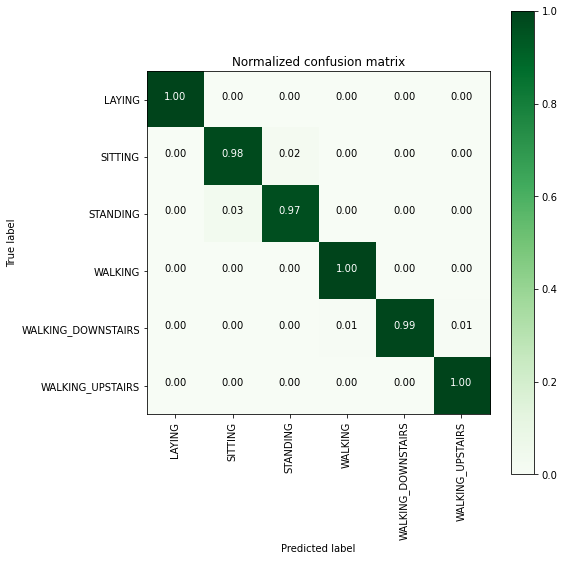

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       476
           SITTING       0.97      0.98      0.97       465
          STANDING       0.98      0.97      0.97       489
           WALKING       1.00      1.00      1.00       407
WALKING_DOWNSTAIRS       1.00      0.99      0.99       346
  WALKING_UPSTAIRS       0.99      1.00      1.00       392

          accuracy                           0.99      2575
         macro avg       0.99      0.99      0.99      2575
      weighted avg       0.99      0.99      0.99      2575



In [47]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

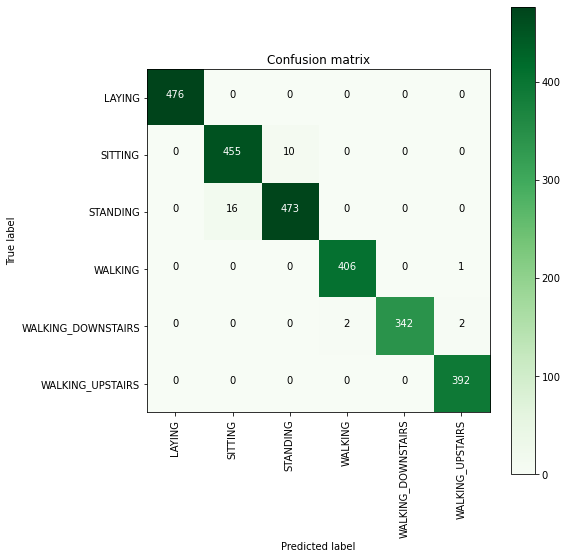

In [49]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [50]:
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=10)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 10, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9770846629099057



**Both models of Logistic Regressions prooduced an accuracy of 98.8%.**
    The initial model, that is, Linear Regression, already showed a promising accuracy at 98.8%. A cross validation score of 97.7% is also promising. The small difference between the two percentages proves that the model is not overfitting. However, the normalized confusion matrix is showing us that the model is most confused between standing and sitting as shown by the 3%. 

## 2. Linear SVC with GridSearch

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:00:34.556577


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.006943


---------------------
|      Accuracy      |
---------------------

    0.9829126213592233


--------------------
| Confusion Matrix |
--------------------

 [[476   0   0   0   0   0]
 [  0 425  40   0   0   0]
 [  0   4 485   0   0   0]
 [  0   0   0 407   0   0]
 [  0   0   0   0 346   0]
 [  0   0   0   0   0 392]]


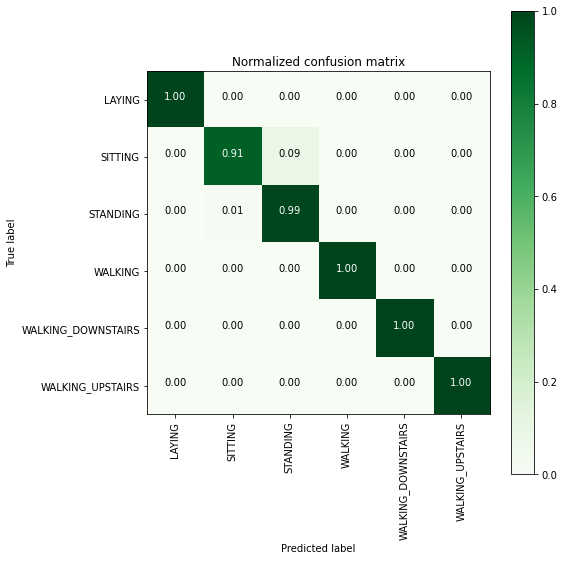

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       476
           SITTING       0.99      0.91      0.95       465
          STANDING       0.92      0.99      0.96       489
           WALKING       1.00      1.00      1.00       407
WALKING_DOWNSTAIRS       1.00      1.00      1.00       346
  WALKING_UPSTAIRS       1.00      1.00      1.00       392

          accuracy                           0.98      2575
         macro avg       0.99      0.98      0.98      2575
      weighted avg       0.98      0.98      0.98      2575



In [51]:
from sklearn.svm import LinearSVC

parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [52]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=16, tol=5e-05)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9816155239197142



**Linear SVC produced an accuracy of 98.2%**
Although not a big difference agains Linear Regresion model, a difference of 0.01 between the accuracy rating and the cross validation score promises the same thing as the linear regression, that it also supports the earlier assumption of not over fitting.

## 3. Decision Tree with GridSearchCV

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:08.711690


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.006981


---------------------
|      Accuracy      |
---------------------

    0.9351456310679611


--------------------
| Confusion Matrix |
--------------------

 [[476   0   0   0   0   0]
 [  0 427  38   0   0   0]
 [  0  42 447   0   0   0]
 [  0   0   0 383   8  16]
 [  0   0   0  11 315  20]
 [  0   2   0  17  13 360]]


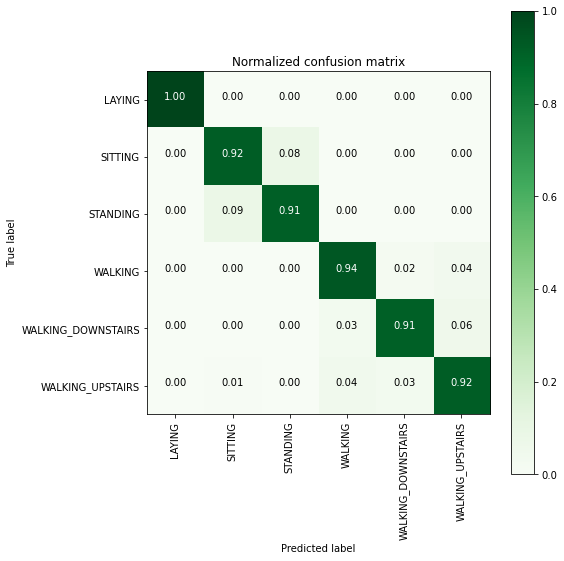

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       476
           SITTING       0.91      0.92      0.91       465
          STANDING       0.92      0.91      0.92       489
           WALKING       0.93      0.94      0.94       407
WALKING_DOWNSTAIRS       0.94      0.91      0.92       346
  WALKING_UPSTAIRS       0.91      0.92      0.91       392

          accuracy                           0.94      2575
         macro avg       0.93      0.93      0.93      2575
      weighted avg       0.94      0.94      0.94      2575

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(max_depth=9)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 9}

---------------------------------
|   No of CrossValidation sets

In [54]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

**Decision tree model produced a quite good accuracy but more than 5% lower than the two models**
The decision tree model produced an accuracy of 93.5%, a 5.3% lower than Logistic regression and almost the same difference when compared with the Linear SVC model. Although 93.5% is still acceptable, but compared to the two other models, the Decision tree model will surely not be the first choice.

### Extra: Tried GridSearchby itself

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = {
    'kernel': ['linear', 'rbf', 'poly','sigmoid'],
    'C': [100, 50, 20, 1, 0.1]
}

selector = GridSearchCV(SVC(), parameters, scoring='accuracy') # we only care about accuracy here
selector.fit(X_train, y_train)

print('Best parameter set found:')
print(selector.best_params_)
print('Detailed grid scores:')
means = selector.cv_results_['mean_test_score']
stds = selector.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, selector.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean, std * 2, params))
    print()

Best parameter set found:
{'C': 100, 'kernel': 'rbf'}
Detailed grid scores:
0.978 (+/-0.009) for {'C': 100, 'kernel': 'linear'}

0.988 (+/-0.006) for {'C': 100, 'kernel': 'rbf'}

0.988 (+/-0.008) for {'C': 100, 'kernel': 'poly'}

0.836 (+/-0.018) for {'C': 100, 'kernel': 'sigmoid'}

0.979 (+/-0.008) for {'C': 50, 'kernel': 'linear'}

0.987 (+/-0.006) for {'C': 50, 'kernel': 'rbf'}

0.987 (+/-0.008) for {'C': 50, 'kernel': 'poly'}

0.855 (+/-0.019) for {'C': 50, 'kernel': 'sigmoid'}

0.981 (+/-0.007) for {'C': 20, 'kernel': 'linear'}

0.985 (+/-0.008) for {'C': 20, 'kernel': 'rbf'}

0.987 (+/-0.007) for {'C': 20, 'kernel': 'poly'}

0.876 (+/-0.016) for {'C': 20, 'kernel': 'sigmoid'}

0.982 (+/-0.007) for {'C': 1, 'kernel': 'linear'}

0.969 (+/-0.012) for {'C': 1, 'kernel': 'rbf'}

0.980 (+/-0.012) for {'C': 1, 'kernel': 'poly'}

0.848 (+/-0.025) for {'C': 1, 'kernel': 'sigmoid'}

0.978 (+/-0.013) for {'C': 0.1, 'kernel': 'linear'}

0.913 (+/-0.010) for {'C': 0.1, 'kernel': 'rbf'}

0.958

In [88]:
clf=SVC(kernel='linear', C=100).fit(X_train, y_train)
y_pred= clf.predict(X_test)
print('Accuracy score:',accuracy_score(y_test,y_pred))

Accuracy score: 0.9860194174757282


In [80]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%      {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 98.8%       1.204%
Linear SVC          : 98.29%      1.709% 
DecisionTree        : 93.51%      6.485% 


Looking at the accuracy and compare among themselves, the obvious choice for the classification problem is either the Logistic Regression or Linear Spport Vector Classification models. 

## 5.0) Writeup
Now it is time to reflect upon your work and tie up your report. The goal of this project was to get you familiar with doing a data science problem from scratch on a custom dataset. First, write some conclusions about your model. Then, consider how it could be used in practice. Finally, write about your experiences and what you learned from this project.

### Use the following questions as inspiration.

1. How could we use this model in practice?
2. Would you trust the model to make decisions?
3. What are the limitations of the model?
4. what are alternative approaches you could try in the future?

**Answers**
1. There are several applcations of this Human Activity Recognition model. Since I work in the healthcare field, I can think of using it for monitoring mobility for long term care facilities as part of metrics in a person's health. In the case of gaming with Nintendo switch, to make it more accurate in reading human activity.
2. With the impressive accuracy of 98% - 99%, I will initially trust the model. However, the model may perform differently in various application of the model. For that, the model will need more testing if to be used for different purposes.
3. The model is limited to the six activities only. It does not include running, or jogging or the more complex activities like eating, cooking, reading, laughing, and many more. In relation to my answer from item 2, I will not trust this model yet based from a raw data. I will coninue to test this with data collected outside of the controled setting, like in a workplace or the actual place where the model will be used.
4. In collecting the data, I can try the approach of using a camera in capturing movements. Or use kinect camera sensors. or even the use of nintendo joycons and make the sensing of activity more accurate.